In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from constraint import Problem
import time

In [4]:
with open("./data/gc_20_1", "r") as file: #20 node
    data1 = file.readlines()
with open("./data/gc_50_7", "r") as file: #50 node
    data2 = file.readlines()
with open("./data/gc_70_1", "r") as file: #70 node
    data3 = file.readlines()
with open("./data/gc_500_3", "r") as file: #500 node
    data4 = file.readlines()
with open("./data/gc_1000_9", "r") as file: #1000 node
    data5 = file.readlines()

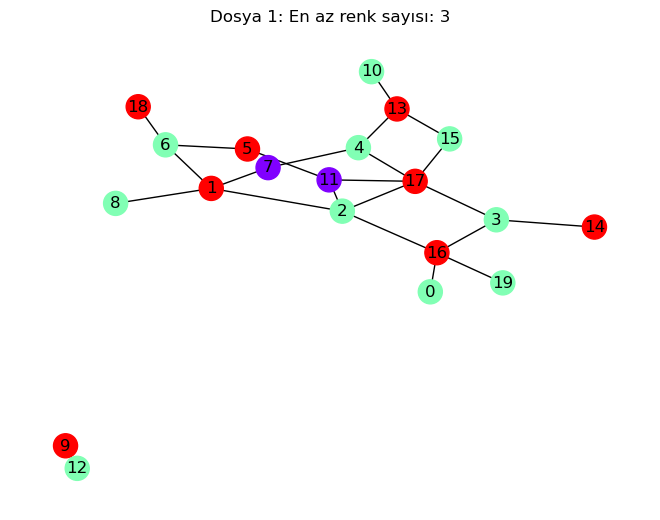

Dosya 1: Kullanılan renk sayısı: 3
İşlem zamanı:0.06276940001407638


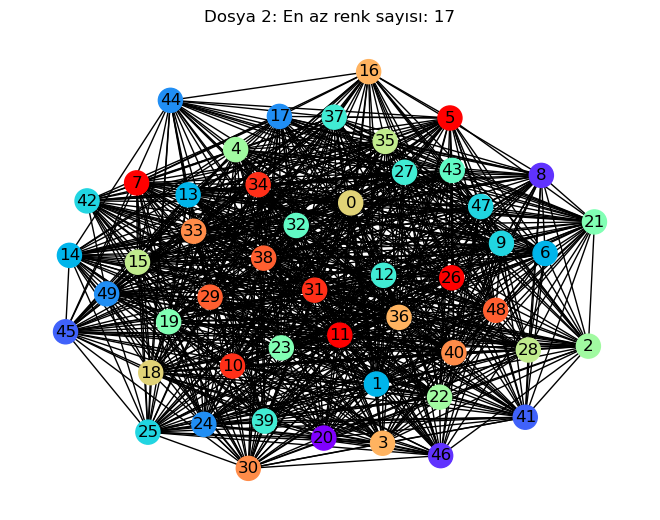

Dosya 2: Kullanılan renk sayısı: 17
İşlem zamanı:2.051325000007637


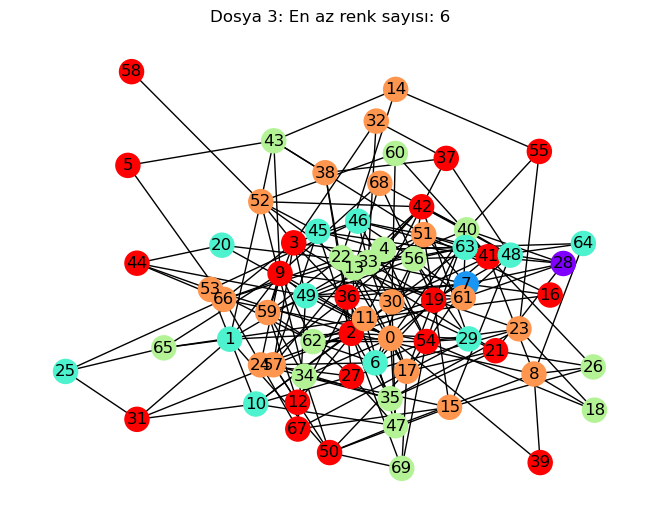

Dosya 3: Kullanılan renk sayısı: 6
İşlem zamanı:0.5581207000068389


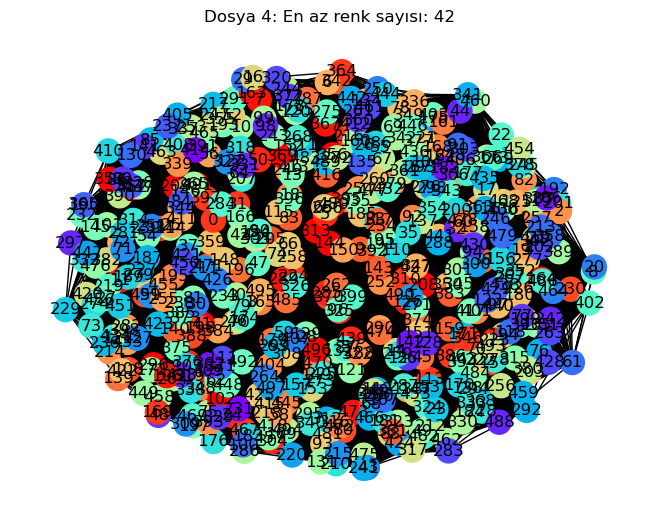

Dosya 4: Kullanılan renk sayısı: 42
İşlem zamanı:66.40222349995747


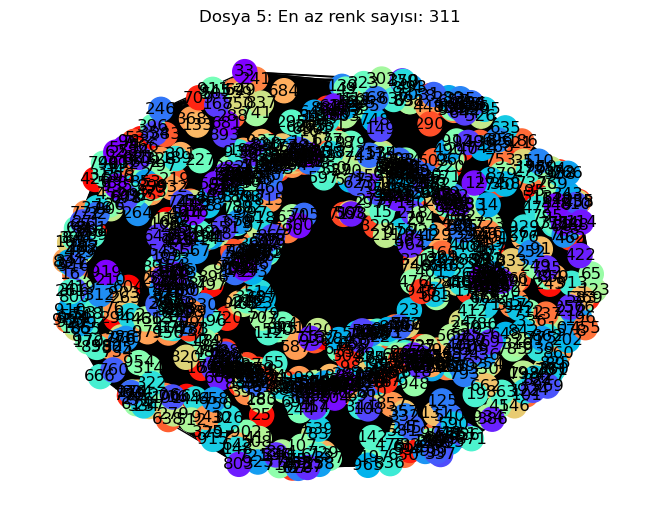

Dosya 5: Kullanılan renk sayısı: 311
İşlem zamanı:594.5106846000417


In [6]:
def color_graph(data):
    # Get number of nodes and edges
    node_count, edge_count = map(int, data[0].split())

    # Define graph
    graph = {}
    for line in data[1:]:
        edge = line.split()
        v1, v2 = int(edge[0]), int(edge[1])
        if v1 not in graph:
            graph[v1] = []
        if v2 not in graph:
            graph[v2] = []
        graph[v1].append(v2)
        graph[v2].append(v1)

    # Define CSP problem
    start_time = time.perf_counter()
    problem = Problem()

    # Create variables for nodes
    for node in range(node_count):
        problem.addVariable(node, range(1000))

    # Constraint that not every neighbor has the same color
    for node in graph:
        for neighbor in graph[node]:
            problem.addConstraint(lambda x, y: x != y, (node, neighbor))

    # Find solution
    solution = problem.getSolution()
    text=[]
    for node, color in solution.items():
        text.append(f"Köşe {node}: Renk {abs(999 - color)}")
    end_time = time.perf_counter()
    timer=end_time-start_time
    return solution, graph,text,timer
    

# Data list
data_lists = [data1, data2, data3, data4, data5]
text_list = []
break_list=[]
for i, data in enumerate(data_lists, start=1):
    solution, graph ,text, timer= color_graph(data)
    if solution is not None:
        # create graph
        G = nx.Graph()
        for node, color in solution.items():
            G.add_node(node, color=color)
            
        for node in graph:
            for neighbor in graph[node]:
                G.add_edge(node, neighbor)
        
        text_list.append(f"Dosya {i}:")
        text_list.append(text)
        text_list.append("-----------------------")
        # create list of colors
        color_map = []
        for node in G.nodes():
            color_map.append(solution[node])

        # Draw graph
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color=color_map, cmap=plt.cm.rainbow)
        plt.title(f"Dosya {i}: En az renk sayısı: {len(set(color_map))}")
        plt.show()
    else:
        print(f"Dosya {i}: Çözüm bulunamadı")

    print(f"Dosya {i}: Kullanılan renk sayısı: {len(set(color_map))}")
    print("İşlem zamanı:"+str(timer))

In [31]:
text_list

['Dosya 1:',
 ['Köşe 17: Renk 0',
  'Köşe 2: Renk 1',
  'Köşe 1: Renk 0',
  'Köşe 16: Renk 0',
  'Köşe 11: Renk 2',
  'Köşe 3: Renk 1',
  'Köşe 4: Renk 1',
  'Köşe 6: Renk 1',
  'Köşe 13: Renk 0',
  'Köşe 5: Renk 0',
  'Köşe 7: Renk 2',
  'Köşe 15: Renk 1',
  'Köşe 0: Renk 1',
  'Köşe 8: Renk 1',
  'Köşe 10: Renk 1',
  'Köşe 14: Renk 0',
  'Köşe 18: Renk 0',
  'Köşe 19: Renk 1',
  'Köşe 9: Renk 0',
  'Köşe 12: Renk 1'],
 '-----------------------',
 'Dosya 2:',
 ['Köşe 11: Renk 0',
  'Köşe 31: Renk 1',
  'Köşe 38: Renk 2',
  'Köşe 40: Renk 3',
  'Köşe 36: Renk 4',
  'Köşe 18: Renk 5',
  'Köşe 35: Renk 6',
  'Köşe 10: Renk 1',
  'Köşe 3: Renk 4',
  'Köşe 33: Renk 3',
  'Köşe 48: Renk 2',
  'Köşe 4: Renk 7',
  'Köşe 19: Renk 8',
  'Köşe 32: Renk 9',
  'Köşe 43: Renk 9',
  'Köşe 0: Renk 5',
  'Köşe 22: Renk 7',
  'Köşe 23: Renk 8',
  'Köşe 27: Renk 10',
  'Köşe 21: Renk 8',
  'Köşe 28: Renk 6',
  'Köşe 34: Renk 1',
  'Köşe 37: Renk 10',
  'Köşe 47: Renk 11',
  'Köşe 39: Renk 10',
  'Köşe 1

In [32]:
file_name = "output.txt"
with open(file_name, "w") as file:
    for text in text_list:
        for line in text:
            file.write(line + "\n")
        file.write("\n") 

## Different Solution

In [8]:
import random

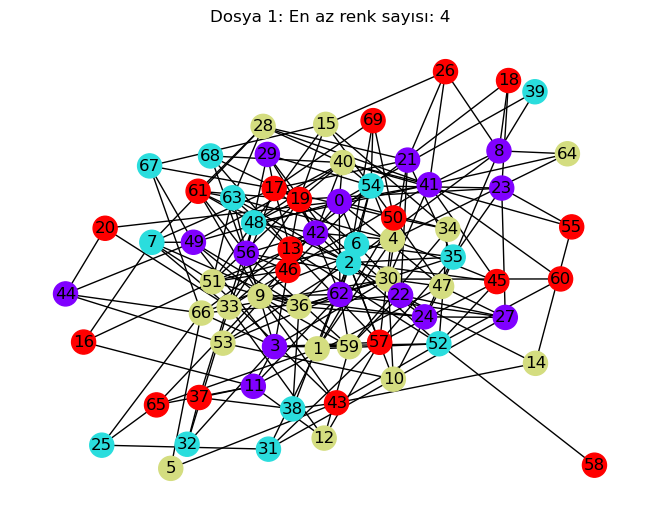

İşlem zamanı:1.436921100015752
Dosya 2: Çözüm bulunamadı
İşlem zamanı:5.384662099997513


In [14]:
def color_graph(data, max_iterations=100, tabu_size=10):
    node_count, edge_count = map(int, data[0].split())

    graph = {}
    for line in data[1:]:
        edge = line.split()
        v1, v2 = int(edge[0]), int(edge[1])
        if v1 not in graph:
            graph[v1] = []
        if v2 not in graph:
            graph[v2] = []
        graph[v1].append(v2)
        graph[v2].append(v1)
    start_time = time.perf_counter() #Start the stopwatch to measure execution time
    problem = Problem()
    for node in range(node_count):
        problem.addVariable(node, range(4))

    for node in graph:
        for neighbor in graph[node]:
            problem.addConstraint(lambda x, y: x != y, (node, neighbor))

    best_solution = None
    best_color_map = []
    tabu_list = []

    for _ in range(max_iterations):
        solution = problem.getSolution()
        if solution is not None:
            color_map = [abs(999 - solution[node]) for node in range(node_count)]
            if best_solution is None or len(set(color_map)) < len(set(best_color_map)):
                best_solution = solution
                best_color_map = color_map
            
            # Update tabu list
            tabu_list.append(color_map)
            if len(tabu_list) > tabu_size:
                tabu_list.pop(0)
                
            # Create a new solution by selecting a random node and assigning a random color
            node_to_change = random.choice(list(range(node_count)))
            new_color = random.choice([color for color in range(1000) if color != solution[node_to_change]])
            solution[node_to_change] = new_color
        
        else:
            break
    end_time = time.perf_counter() #End the stopwatch to measure execution time
    timer=end_time-start_time # Calculate the execution time
    return best_solution, graph, best_color_map,timer

data_lists = [data3]
text_list = []
break_list=[]
for i, data in enumerate(data_lists, start=1):
    solution, graph, color_map, timer= color_graph(data)
    if solution is not None:
        G = nx.Graph()
        for node, color in solution.items():
            G.add_node(node, color=color)
        for node in graph:
            for neighbor in graph[node]:
                G.add_edge(node, neighbor)
        
        text_list.append(f"Dosya {i}:")
        text_list.append([f"Köşe {node}: Renk {color_map[node]}" for node in range(len(color_map))])
        text_list.append("-----------------------")
        
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color=color_map, cmap=plt.cm.rainbow)
        plt.title(f"Dosya {i}: En az renk sayısı: {len(set(color_map))}")
        plt.show()
    else:
        print(f"Dosya {i}: Çözüm bulunamadı")
    print("İşlem zamanı:"+str(timer))

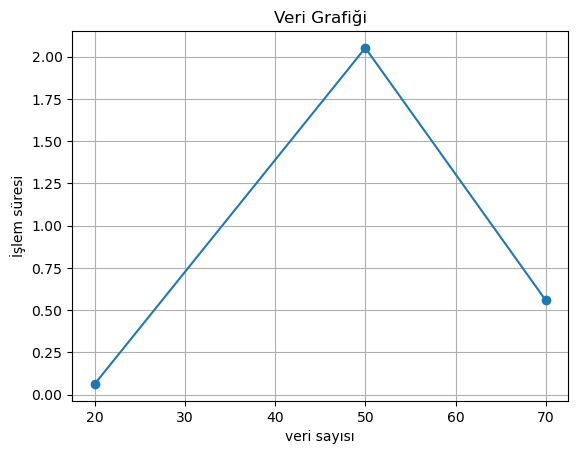

In [4]:
import matplotlib.pyplot as plt

x = [20, 50, 70]
y = [0.06276940001407638, 2.051325000007637, 0.5581207000068389]

plt.plot(x, y, marker='o')
plt.title('Veri Grafiği')
plt.xlabel('veri sayısı')
plt.ylabel('İşlem süresi')
plt.grid(True)
plt.show()